# Notebook to analyze latent space of HCP left size, when trained with all subjects of HCP, left cingulate

In [7]:
import umap
import math
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.decomposition import DictionaryLearning
from scipy.stats import binom_test

import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import seaborn as sns

from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_predict

from contrastive.evaluation.train_multiple_classifiers import compute_auc

In [8]:
# test model
test_model = "/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/trained_on_all_left_HCP/12-02-04"
dataset_train = 'left_cingulate_HCP_full_top-separated'

# load the data
train_df = pd.read_csv(test_model+'/'+dataset_train+'_embeddings/train_val_embeddings.csv', index_col=0)
train_df.sort_index(inplace=True)
len(train_df)

1113

In [9]:
dataset_test = 'left_cingulate_HCP_full_top-separated'

test_df = pd.read_csv(test_model+'/'+dataset_test+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
test_df.sort_index(inplace=True)


In [10]:
dataset_second = 'left_cingulate_ACCpatterns'
second_df = pd.read_csv(test_model+'/'+dataset_second+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
second_df.sort_index(inplace=True)


# load the labels
prediction_df = pd.read_csv(test_model+'/'+dataset_second+'_embeddings/cross_val_predicted_labels.csv', index_col=0)
prediction_df.sort_index(inplace=True)
len(prediction_df)

341

In [11]:
dataset_third = 'left_cingulate_HCP_full_top-separated'
third_df = pd.read_csv(test_model+'/'+dataset_third+'_embeddings/cross_val_effective_embeddings.csv', index_col=0)
third_df.sort_index(inplace=True)

In [12]:
prediction_df.head()

,label,svm_0,svm_1,svm_2,svm_3,svm_4,svm_5,svm_6,svm_7,svm_8,...,svm_243,svm_244,svm_245,svm_246,svm_247,svm_248,svm_249,median_pred,mean_pred,average_model
Subject,,,,,,,,,,,,,,,,,,,,,
1-03HUBJO_t0,0,0.173969,0.209856,0.219772,0.208060,0.197325,0.236795,0.218207,0.226205,0.251259,...,0.239822,0.216784,0.210278,0.207539,0.203432,0.193278,0.233920,0.207738,0.207355,0.223522
1-08ANDTI_t0,1,0.481708,0.513527,0.511782,0.511946,0.509936,0.509129,0.506286,0.515467,0.525199,...,0.525001,0.511776,0.491560,0.483285,0.500000,0.492832,0.524467,0.500000,0.505536,0.513336
1-11LEBJO_t0,1,0.240554,0.279600,0.287874,0.277667,0.267676,0.301838,0.285281,0.294266,0.317777,...,0.308104,0.285277,0.275128,0.270935,0.271642,0.260391,0.302956,0.274939,0.275440,0.291469
1-15LEHMI_t0,1,0.500000,0.528573,0.526115,0.527044,0.525675,0.522296,0.520486,0.529549,0.538186,...,0.538651,0.526298,0.505640,0.500000,0.518152,0.508120,0.538450,0.519869,0.520634,0.527497
1-17COLMA_t0,1,0.918936,0.915223,0.905630,0.915325,0.922062,0.887953,0.901834,0.903650,0.891939,...,0.901377,0.908114,0.894629,0.888733,0.911602,0.911369,0.905670,0.910493,0.910602,0.903913


## Visualize umap

In [13]:
def display_umaps_true_labels(visual_embs_train, reducer, test_df, prediction_df, verbose=False):
    if verbose:
        print("Test df:")
        print(test_df[:5])
        print("Prediction df:")
        print(prediction_df[:5])

    # apply umap
    if verbose:
        print("UMAP embeddings")
        print(visual_embs_train.shape)
        print(visual_embs_train[:5])
    visual_embs_test = reducer.transform(test_df)

    ## plot the graphs

    # plt.figure()
    # plt.scatter(visual_embs_train[:,0], visual_embs_train[:,1], c='green', alpha=0.4)

    # plot for true labels/volatile/jc225751/Runs/59_analysis_ukbiobank/Output/
    cmap = ['b', 'r']
    colors = [cmap[i] for i in prediction_df.label]

    plt.scatter(visual_embs_train[:,0], visual_embs_train[:,1], c=colors, s=1, alpha=0.6)
    plt.title("True labels")
    plt.show()
    
    plt.show()

    return pd.DataFrame(visual_embs_test, index=test_df.index.values)

In [14]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [15]:
len(third_df)

1113

# UMAP on HCP

In [52]:
visual_embs, reducer = compute_umap(test_df, n_neighbors=15)

In [53]:
hcp_embs = visual_embs.copy()

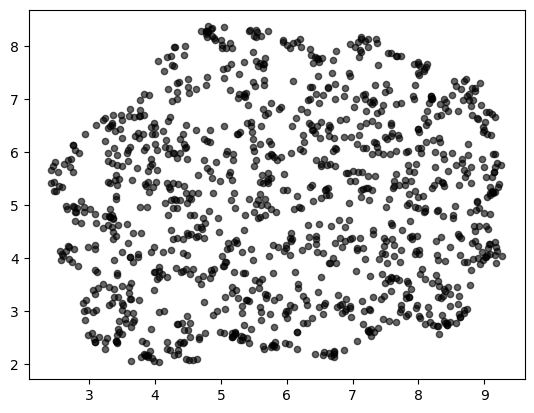

In [54]:
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='black', s=20, alpha=0.6)

In [55]:
second_embs = reducer.transform(second_df)

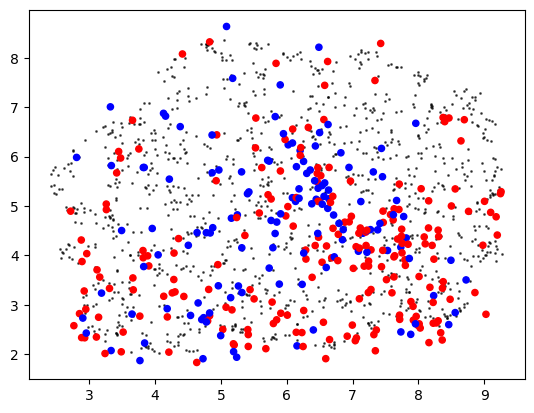

In [59]:
# plot for true labels
cmap = ['b', 'r']
colors = [cmap[i] for i in prediction_df.label]

plt.scatter(visual_embs[:,0], visual_embs[:,1], c='black', s=1, alpha=0.6)
plt.scatter(second_embs[:,0], second_embs[:,1], c=colors, s=20, alpha=1)

In [57]:
third_embs = reducer.transform(third_df)

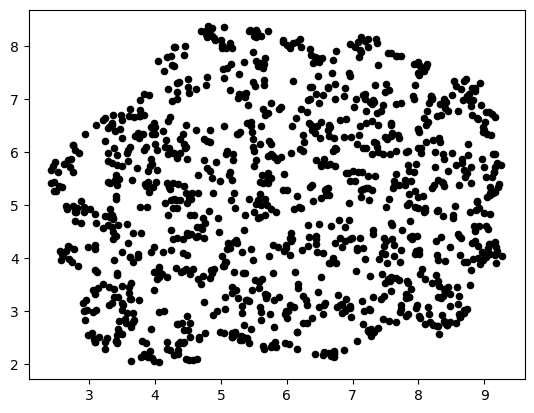

In [58]:
plt.scatter(third_embs[:,0], third_embs[:,1], c='g', s=1, alpha=0.6)
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='black', s=20, alpha=1)


# UMAP on UKBioBank

In [45]:
visual_embs, reducer = compute_umap(third_df, n_neighbors=100)

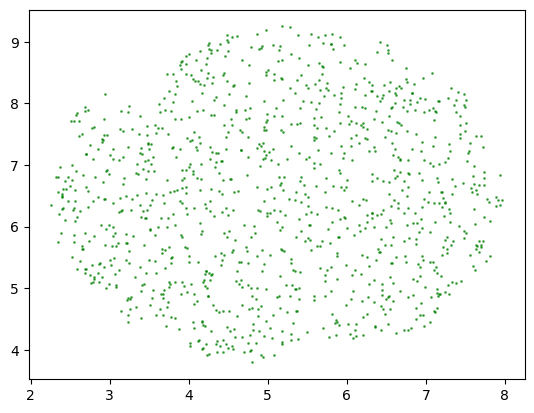

In [46]:
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='g', s=1, alpha=0.6)

In [47]:
second_embs = reducer.transform(second_df)

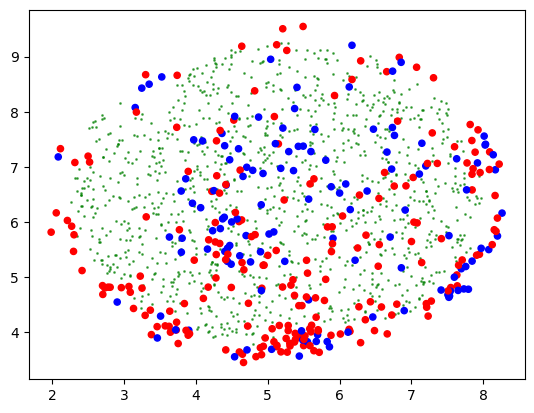

In [48]:
cmap = ['b', 'r']
colors = [cmap[i] for i in prediction_df.label]
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='g', s=1, alpha=0.6)
plt.scatter(second_embs[:,0], second_embs[:,1], c=colors,  s=20, alpha=1)

In [49]:
second_df.head()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
ID,,,,,,,,,,
1-03HUBJO_t0,-1.460765,-6.572562,-6.169390,0.662511,2.934481,-4.126019,-0.793172,-8.603510,-1.262469,-3.186342
1-08ANDTI_t0,4.930673,-5.218751,-0.998441,1.835334,-2.854055,3.299637,-5.879926,-8.623412,0.505263,-17.414192
1-11LEBJO_t0,-0.470983,-2.989170,0.891972,-3.746060,4.289411,1.254470,6.245503,-8.732409,5.775834,0.119879
1-15LEHMI_t0,2.387758,-4.928181,-10.887918,1.382470,1.559210,-0.551077,0.654937,-0.463516,-6.064888,4.061680
1-17COLMA_t0,3.441112,-3.158225,-10.384470,5.438023,-2.318019,8.965915,12.702372,-6.380221,-6.851333,12.663750


In [50]:
third_embs = reducer.transform(test_df)

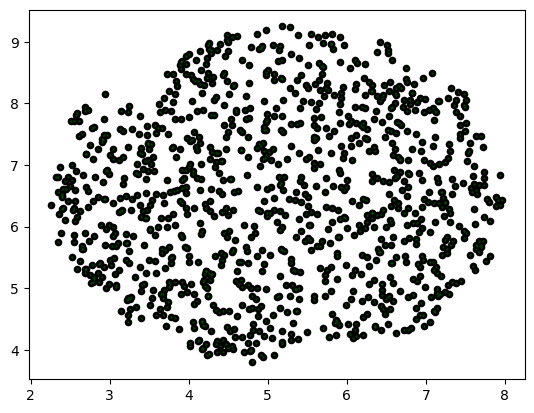

In [51]:
plt.scatter(third_embs[:,0], third_embs[:,1], c='black', s=20, alpha=1)
plt.scatter(visual_embs[:,0], visual_embs[:,1], c='g', s=1, alpha=0.3)

# Density map of HCP

In [30]:
Z, xedges, yedges = np.histogram2d(hcp_embs[:,0], hcp_embs[:,1], bins=15, normed=True)

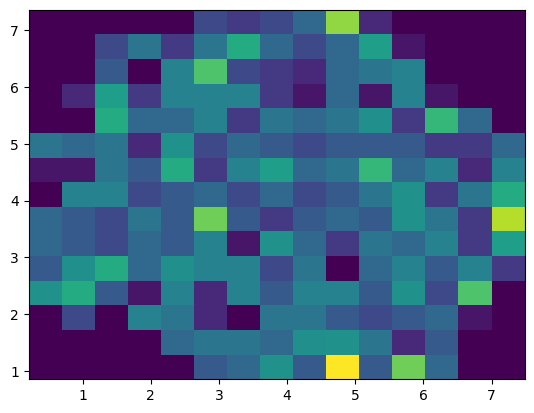

In [31]:
plt.pcolormesh(xedges, yedges, Z.T)

In [32]:
# fig, ax = plt.subplots(figsize=[15,8])
# plt.imshow(Z.T)

In [33]:
Z = Z/np.unique(Z)[1]

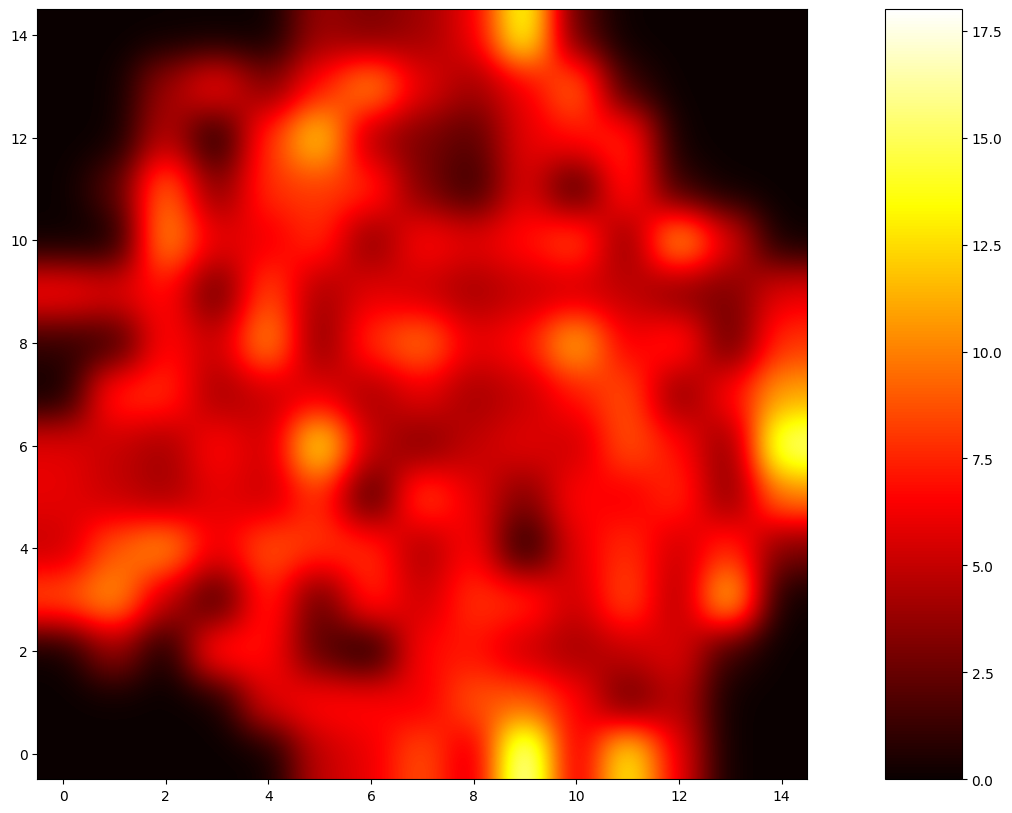

In [34]:
fig, ax = plt.subplots(figsize=[20,10])
cax = ax.imshow(Z.T,
          origin='lower',
          cmap='hot', 
          interpolation='gaussian'
          )
cbar   = fig.colorbar(cax,aspect=10)

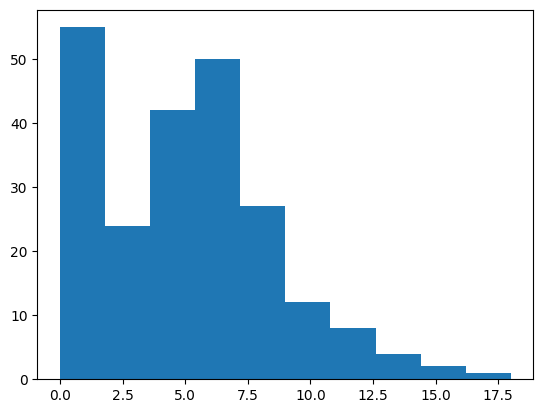

In [35]:
h = plt.hist(Z.reshape(Z.size,1), bins=10)

In [36]:
# import scipy.ndimage as ndi

In [37]:
# img = ndi.gaussian_filter(Z, (1,1))
# f, axs = plt.subplots(1, 1, figsize=(15, 15))
# plt.imshow(img)